> # **FastText**
- FastText represents a word as a sum of its character n-gram embeddings. This helps with rare words, misspellings, and morphologically rich text (e.g., play, playing, player share subwords).

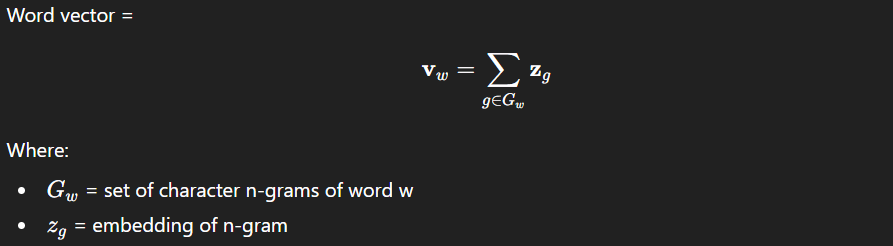

> ## Practical Applications
- Multilingual applications where training data may be limited for some languages
- Domain-specific text with specialized vocabulary not found in general corpora
- Real-time systems requiring fast inference and low memory overhead
- Text classification tasks where subword information provides discriminative features

In [5]:
# import the libraries
!pip install gensim spacy
!python -m spacy download en_core_web_sm

import spacy
from gensim.models import FastText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
# Pre-processing
nlp = spacy.load('en_core_web_sm')

corpus = [
    "Natural language processing enables machines to understand text",
    "FastText uses subword information",
    "GloVe uses matrix factorization",
    "Word embeddings capture semantic meaning"
]

docs = nlp.pipe(corpus, batch_size=10)

sentences = [[token.text.lower() for token in doc if token.is_alpha and token.lemma_] for doc in docs]
print(sentences[:10])

[['natural', 'language', 'processing', 'enables', 'machines', 'to', 'understand', 'text'], ['fasttext', 'uses', 'subword', 'information'], ['glove', 'uses', 'matrix', 'factorization'], ['word', 'embeddings', 'capture', 'semantic', 'meaning']]


In [11]:
# Train FastText Model
fasttext_model = FastText(
    sentences = sentences,
    vector_size = 100,
    window = 5,
    min_count =1,
    sg = 1,                            # Skip-Gram
    min_n = 3,                         # min char ngram
    max_n = 6,                         # max char ngram
    epochs = 10
)

# test embeddings
fasttext_model.wv.most_similar('language')

[('capture', 0.21138720214366913),
 ('machines', 0.13043217360973358),
 ('uses', 0.1028887927532196),
 ('text', 0.06355412304401398),
 ('subword', 0.06154331937432289),
 ('information', 0.04201123118400574),
 ('embeddings', 0.033972300589084625),
 ('word', 0.022624889388680458),
 ('natural', 0.016885176301002502),
 ('meaning', 0.016025736927986145)]

> # Cosine Similarity

In [20]:
print("Cosine similarity between 'processing' " +
      "and 'language' - CBOW : ",
      fasttext_model.wv.similarity('processing', 'language'))

Cosine similarity between 'processing' and 'language' - CBOW :  -0.13332042


> ## Test OOV (Out-of-Vocabulary)

In [12]:
fasttext_model.wv['languaging']        # Works even if not in corpus

array([ 1.64259854e-03,  1.57969407e-04,  1.42587430e-03, -1.25972310e-03,
        1.63212942e-03,  7.23287580e-04,  2.72671925e-04, -2.65703158e-04,
       -7.46007368e-04,  1.25567277e-03, -7.32496846e-04, -9.17544530e-04,
        7.95302214e-04, -3.04529967e-04,  7.59603281e-04, -5.26208372e-04,
        1.17834890e-03, -5.79995860e-04, -7.42327888e-04, -7.60615862e-04,
       -1.84641103e-03,  3.54055628e-05, -9.62426886e-04,  1.28926884e-03,
        1.87564595e-03, -1.35415164e-03,  1.83227099e-03,  2.04409385e-04,
       -1.36512477e-04,  6.44253683e-04,  4.08164749e-04,  1.85302913e-03,
        1.66236830e-03,  4.54927795e-05,  2.13107443e-03, -9.08208545e-04,
        8.30975769e-04,  7.47782062e-04,  2.96605256e-04, -5.19735098e-04,
       -2.80066306e-04, -4.13859561e-05, -3.86341708e-04, -1.07374578e-03,
       -2.41742659e-04, -1.17854506e-04, -9.62336955e-04,  5.17323613e-04,
        2.21632025e-03,  3.88246786e-04,  1.23384118e-03,  8.44215538e-05,
        2.22252356e-03,  

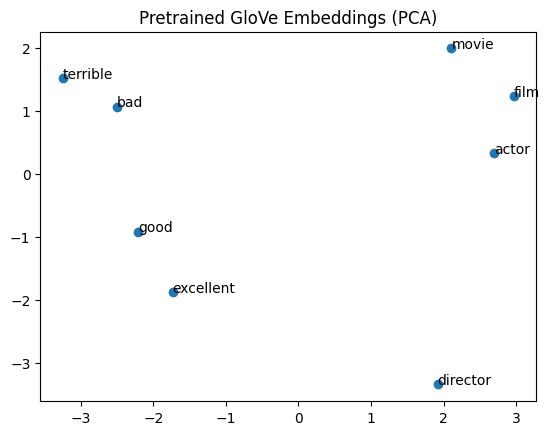

In [17]:
# visualize the fasttext model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

words = ["good", "bad", "excellent", "terrible", "movie", "film", "actor", "director"]

vectors = np.array([glove_model[word] for word in words])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure()
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

plt.title("Pretrained GloVe Embeddings (PCA)")
plt.show()

> ## Optional: Use t-SNE (Better Semantic Separation)

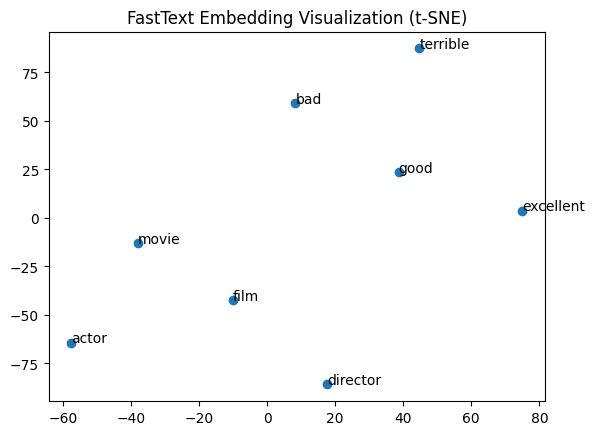

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Adjust perplexity to be less than n_samples (which is 8, based on the 'words' list)
tsne = TSNE(n_components=2, perplexity=5, random_state=42) # Changed perplexity from 15 to 5

reduced = tsne.fit_transform(vectors)

plt.figure()
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

plt.title("FastText Embedding Visualization (t-SNE)")
plt.show()

> ## Use Pretrained GloVe via Gensim (Stable)

> # Glove
- GloVe learns embeddings by factorizing the global word–word co-occurrence matrix.

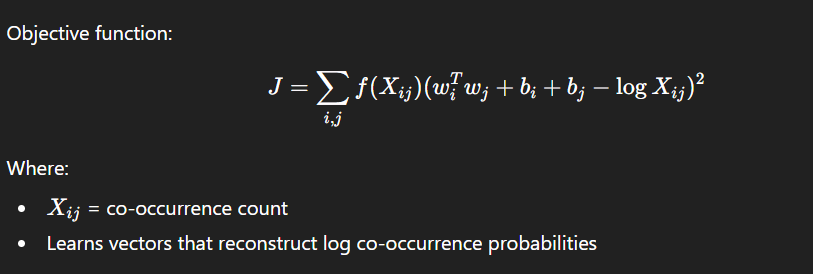

In [14]:
# load the pre-trained model
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-100")  # 100-dim vectors


[==================================================] 100.0% 128.1/128.1MB downloaded


In [15]:
# check
glove_model.most_similar("language")

[('languages', 0.8260655403137207),
 ('word', 0.7464082837104797),
 ('spoken', 0.7381494045257568),
 ('arabic', 0.7318817377090454),
 ('english', 0.7214903831481934),
 ('dialect', 0.6912703514099121),
 ('vocabulary', 0.6908208727836609),
 ('text', 0.685594916343689),
 ('translation', 0.6810674667358398),
 ('words', 0.6715823411941528)]

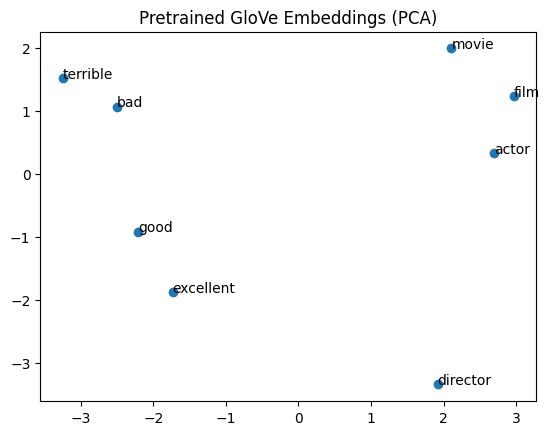

In [16]:
# visualize the pretrained Glove model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

words = ["good", "bad", "excellent", "terrible", "movie", "film", "actor", "director"]

vectors = np.array([glove_model[word] for word in words])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure()
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

plt.title("Pretrained GloVe Embeddings (PCA)")
plt.show()